In [194]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

import random
import numpy as np
random.seed(7)
np.random.seed(7)
torch.manual_seed(7)

import math


class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, 3)
        self.act1 = torch.nn.Sigmoid()
        self.act2 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(3, n_hidden_neurons)
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.fc5 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.fc6 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.fc7 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.fc8 = torch.nn.Linear(n_hidden_neurons, 1)
    
    def forward (self, x):
        x = self.fc1(x)
        x = self.act2(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act2(x)
#         x = self.fc4(x)
#         x = self.act1(x)
#         x = self.fc5(x)
#         x = self.act1(x)
#         x = self.fc6(x)
#         x = self.act1(x)
#         x = self.fc7(x)
#         x = self.act1(x)
        x = self.fc8(x)
        
        return x

net = RegressionNet(500)

def target_function(x):
#     return -3**x * torch.sin(2**-x)
#     return ((x**(4/3)-4*(x**2)+4)**(1/2))*20
      return torch.sin(x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(0, 30, 50)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 100.
y_train = y_train + 0
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(10, 20, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()
  
def predict(net, x_train, y_train, x_eval, y_eval):
    y_pred = net.forward(x_train)
    y_post = net.forward(x_eval)

    #plt.xlim (-25, 25)
    #plt.ylim (0, 200)
    plt.plot(x_train.numpy(), y_train.numpy(), 'o', label='Искомая зависимость')
    plt.plot(x_train.numpy(), y_pred.data.numpy(), 'o', c='r', label='Тренировочный датасет');
    plt.plot(x_eval.numpy(), y_post.data.numpy(), 'o', c='y', label='Валидационный датасет');
    plt.legend(loc='upper left')
    plt.xlabel('$x (Sigmoid) $')
    plt.ylabel('$y$')
    
for epoch_index in range( 2500 ):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
    

In [195]:
print(metric(net.forward(x_validation), y_validation).item())
print(metric(net.forward(x_train), y_train).item())

0.6419727802276611
0.562770664691925


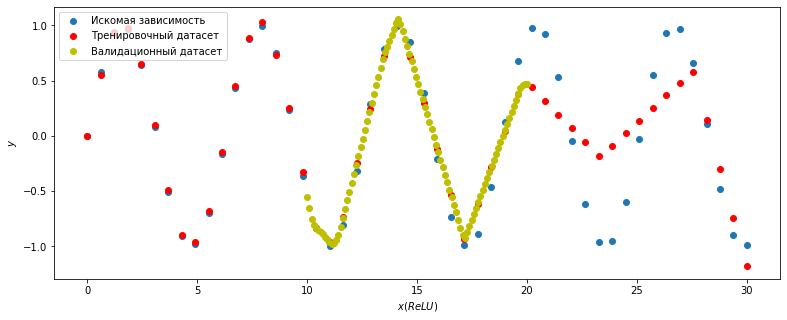

In [187]:
predict(net, x_train, y_train, x_validation, y_validation)

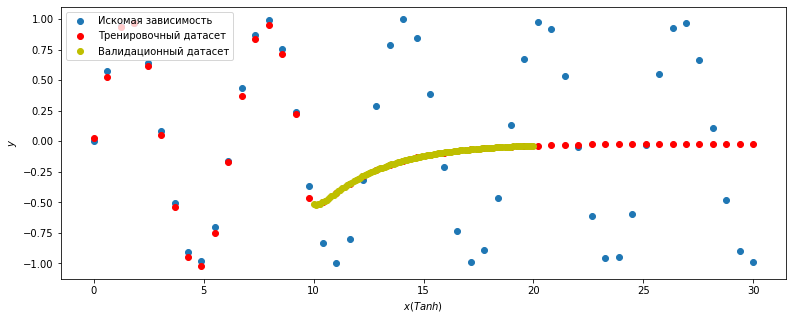

In [193]:
predict(net, x_train, y_train, x_validation, y_validation)

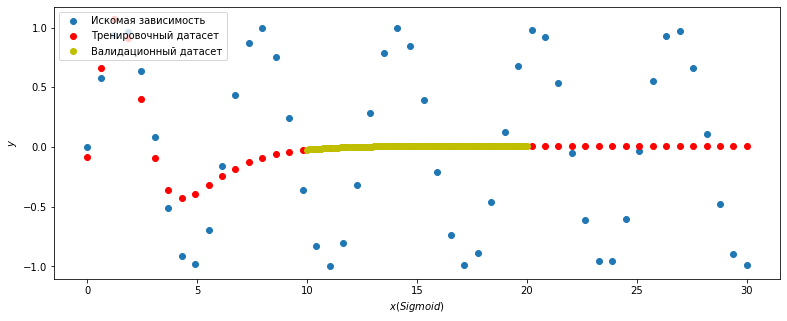

In [196]:
predict(net, x_train, y_train, x_validation, y_validation)

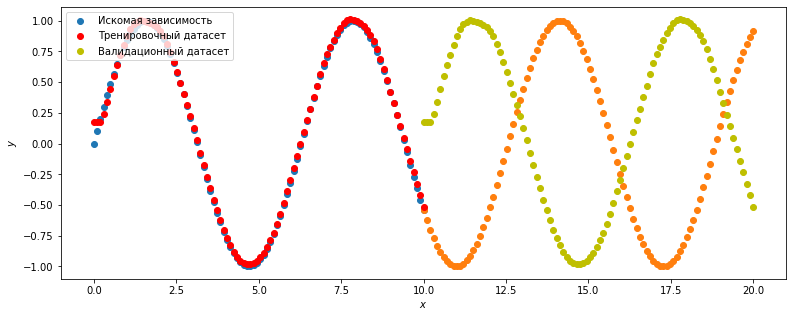

In [78]:
predict(net, x_train, y_train, x_validation, y_validation)

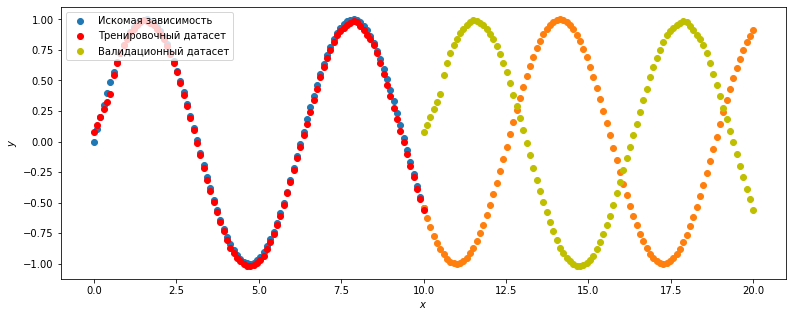

In [82]:
predict(net, x_train, y_train, x_validation, y_validation)

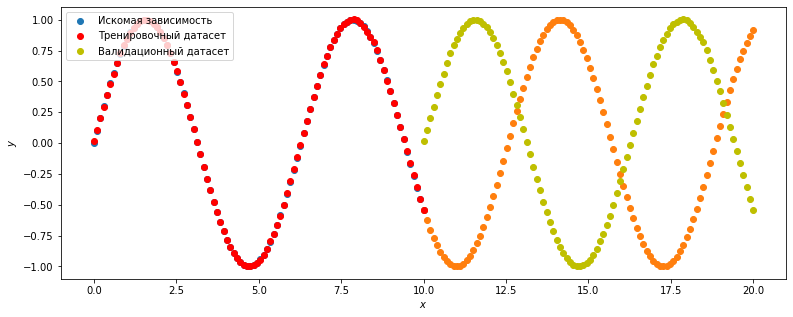

In [84]:
predict(net, x_train, y_train, x_validation, y_validation)